In [223]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, auc, plot_roc_curve,ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score, balanced_accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import pickle
#pd.set_option('display.max_rows', 500)
pd. set_option('display.max_columns', 500)
#import missingno as msno

In [149]:
df = pd.read_csv("Customer-Churn.csv")

In [150]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [151]:
train,test = train_test_split(df, test_size=0.2, random_state=123)

In [152]:
#A1
train.reset_index(drop=True, inplace=True)

In [153]:
train.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,6457-GIRWB,Male,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.35,69.35,Yes
1,5115-GZDEL,Male,0,No,Yes,72,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),67.20,4671.7,No


In [154]:
print(df.shape)
print(train.shape)
print(test.shape)

(7043, 21)
(5634, 21)
(1409, 21)


In [155]:
train.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [156]:
train.drop(['customerID'], axis=1, inplace=True)

In [157]:
train.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [158]:
train['TotalCharges'].unique()

array(['69.35', '4671.7', '1474.75', ..., '3409.1', '1258.6', '232.35'],
      dtype=object)

In [159]:
train[train['TotalCharges'] == ' ']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1343,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
2371,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
3880,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
4054,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
4189,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,,No
5039,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
5528,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
5629,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No


In [160]:
#A3
train['TotalCharges'] = train['TotalCharges'].replace(' ',np.nan)
    

In [161]:
train.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        8
Churn               0
dtype: int64

In [162]:
#A4
train['TotalCharges'] = train['TotalCharges'].astype(float)

In [163]:
train.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [164]:
from sklearn.impute import SimpleImputer, KNNImputer

In [165]:
cat = []
for i in train.columns:
    if train[i].dtype =='O':
        cat.append(i)

In [166]:
cat

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [167]:
#for i in cat:
    #if train[i].dtype =='O':
        #train[i] = pd.Categorical(train[i]).codes
        
        #train[i] = pd.Categorical(train[i]).codes

In [168]:
train.duplicated().sum()

14

In [169]:
#A5
train.drop_duplicates(keep='first', inplace=True)

In [170]:
train.duplicated().sum()

0

In [171]:
train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.35,69.35,Yes
1,Male,0,No,Yes,72,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),67.20,4671.70,No
2,Male,1,Yes,No,21,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.10,1474.75,Yes
3,Male,0,Yes,No,25,Yes,No,Fiber optic,No,No,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),95.70,2338.35,No
4,Male,1,Yes,No,71,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),24.85,1901.00,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
5630,Male,0,Yes,Yes,54,Yes,Yes,DSL,No,No,Yes,No,No,Yes,Two year,No,Credit card (automatic),63.35,3409.10,No
5631,Female,0,Yes,Yes,14,Yes,Yes,Fiber optic,No,No,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,87.25,1258.60,Yes
5632,Female,1,Yes,Yes,29,No,No phone service,DSL,No,Yes,Yes,No,No,No,Month-to-month,Yes,Mailed check,35.65,1025.15,No


In [172]:
#A6
train.reset_index(drop=True, inplace=True)

In [173]:
train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.35,69.35,Yes
1,Male,0,No,Yes,72,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),67.20,4671.70,No
2,Male,1,Yes,No,21,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.10,1474.75,Yes
3,Male,0,Yes,No,25,Yes,No,Fiber optic,No,No,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),95.70,2338.35,No
4,Male,1,Yes,No,71,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),24.85,1901.00,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5615,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
5616,Male,0,Yes,Yes,54,Yes,Yes,DSL,No,No,Yes,No,No,Yes,Two year,No,Credit card (automatic),63.35,3409.10,No
5617,Female,0,Yes,Yes,14,Yes,Yes,Fiber optic,No,No,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,87.25,1258.60,Yes
5618,Female,1,Yes,Yes,29,No,No phone service,DSL,No,Yes,Yes,No,No,No,Month-to-month,Yes,Mailed check,35.65,1025.15,No


In [174]:
#A7
train.dropna(inplace=True)
train.reset_index(drop=True,inplace=True)

In [175]:
train.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [176]:
for i in cat:
    if train[i].dtype == 'O':
        print(f"{i} has {train[i].nunique()}categories\nThey are:\n{train[i].unique()}\n")

gender has 2categories
They are:
['Male' 'Female']

Partner has 2categories
They are:
['No' 'Yes']

Dependents has 2categories
They are:
['No' 'Yes']

PhoneService has 2categories
They are:
['Yes' 'No']

MultipleLines has 3categories
They are:
['No' 'No phone service' 'Yes']

InternetService has 3categories
They are:
['Fiber optic' 'DSL' 'No']

OnlineSecurity has 3categories
They are:
['No' 'Yes' 'No internet service']

OnlineBackup has 3categories
They are:
['No' 'Yes' 'No internet service']

DeviceProtection has 3categories
They are:
['No' 'Yes' 'No internet service']

TechSupport has 3categories
They are:
['No' 'Yes' 'No internet service']

StreamingTV has 3categories
They are:
['No' 'Yes' 'No internet service']

StreamingMovies has 3categories
They are:
['No' 'Yes' 'No internet service']

Contract has 3categories
They are:
['Month-to-month' 'Two year' 'One year']

PaperlessBilling has 2categories
They are:
['Yes' 'No']

PaymentMethod has 4categories
They are:
['Electronic check' 'C

In [177]:
col = train.columns

In [178]:
#A8
X_train = train.drop(['Churn'], axis=1)
y_train = train['Churn']

In [179]:
cat1 = []
for i in X_train.columns:
    if X_train[i].dtype =='O':
        cat1.append(i)

In [180]:
#A9
encoder = OneHotEncoder(drop='first',dtype=int)
enc_data = pd.DataFrame(encoder.fit_transform(X_train[cat1]).toarray())
enc_data.columns = encoder.get_feature_names_out()
X_train = X_train.join(enc_data)
X_train.drop(cat1,axis=1,inplace=True)

In [181]:
X_train

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,69.35,69.35,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,0,72,67.20,4671.70,1,0,1,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0
2,1,21,69.10,1474.75,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
3,0,25,95.70,2338.35,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,1,0,0
4,1,71,24.85,1901.00,1,1,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5607,0,17,70.50,1165.60,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5608,0,54,63.35,3409.10,1,1,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0
5609,0,14,87.25,1258.60,0,1,1,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0
5610,1,29,35.65,1025.15,0,1,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1


In [182]:
coll = X_train.columns

In [183]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train,columns=coll)

In [184]:
X_train

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.000000,0.508458,0.005833,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,1.000000,0.487065,0.536914,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,1.0,0.281690,0.505970,0.168007,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,0.338028,0.770647,0.267661,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
4,1.0,0.985915,0.065672,0.217194,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5607,0.0,0.225352,0.519900,0.132333,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5608,0.0,0.746479,0.448756,0.391219,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
5609,0.0,0.183099,0.686567,0.143065,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
5610,1.0,0.394366,0.173134,0.116126,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


<AxesSubplot:>

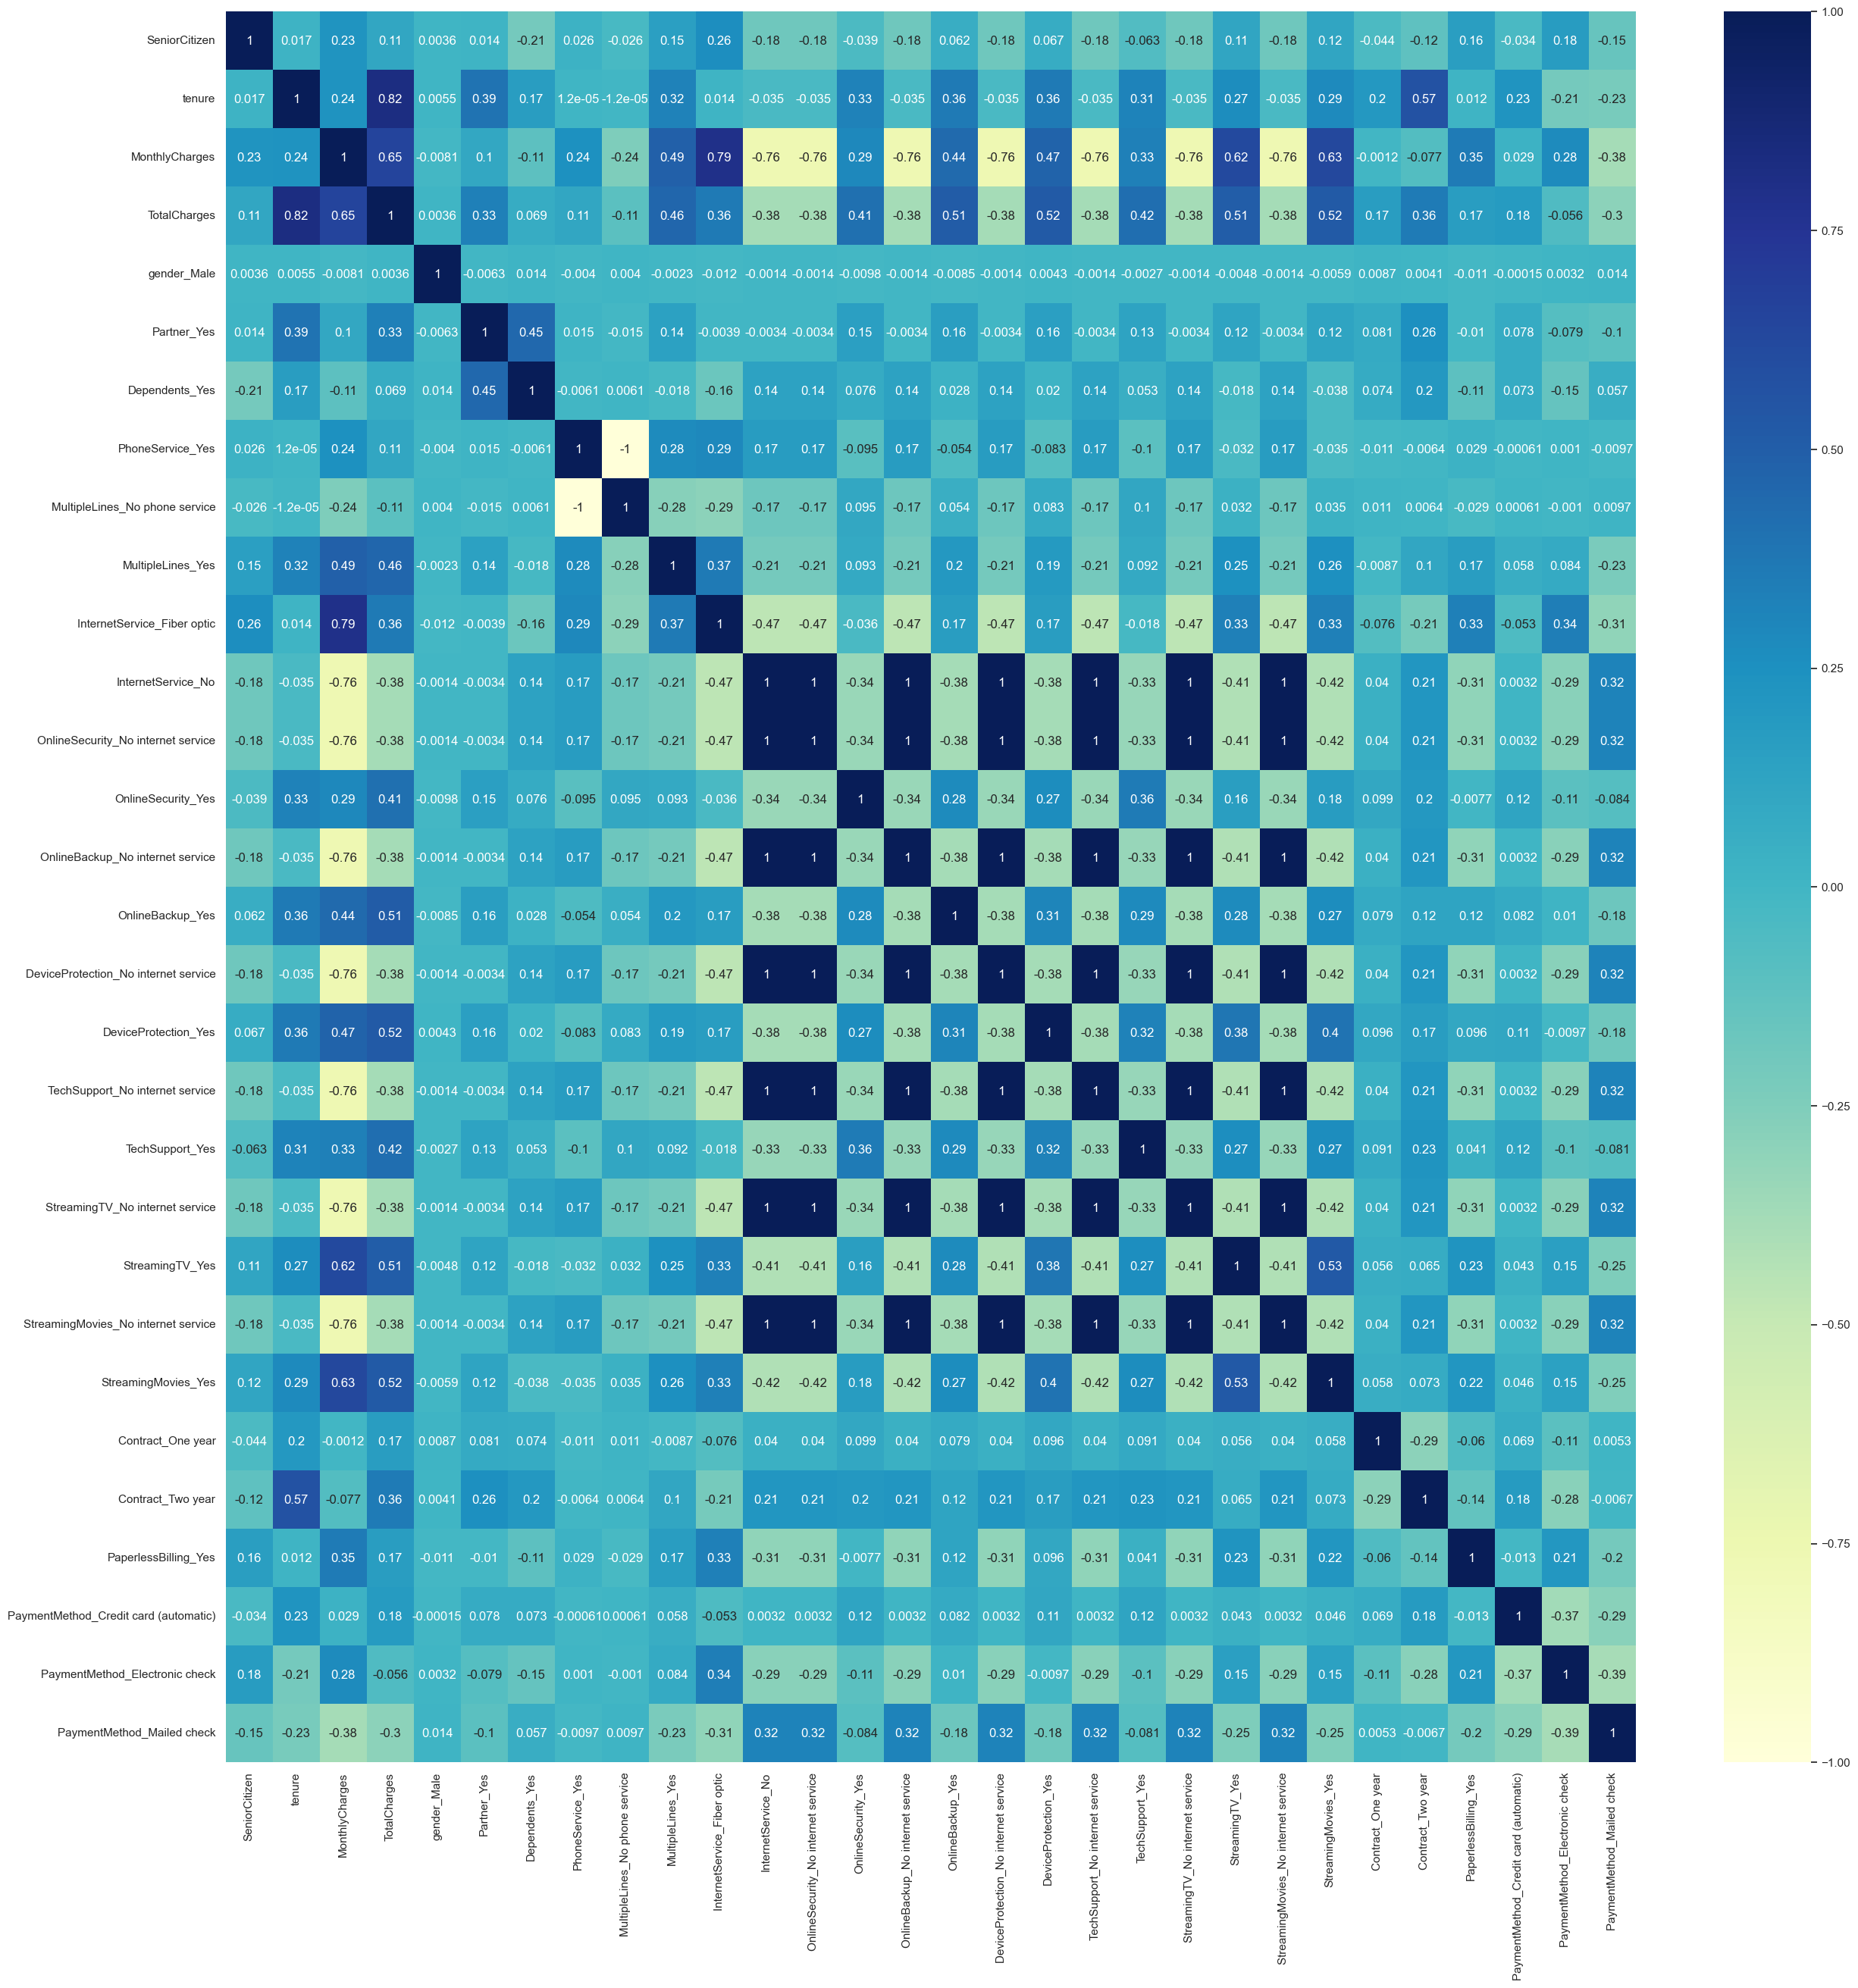

In [185]:
plt.figure(figsize=(30, 30))
cors = X_train.corr()
sns.heatmap(cors, annot=True, cmap="YlGnBu")

<AxesSubplot:>

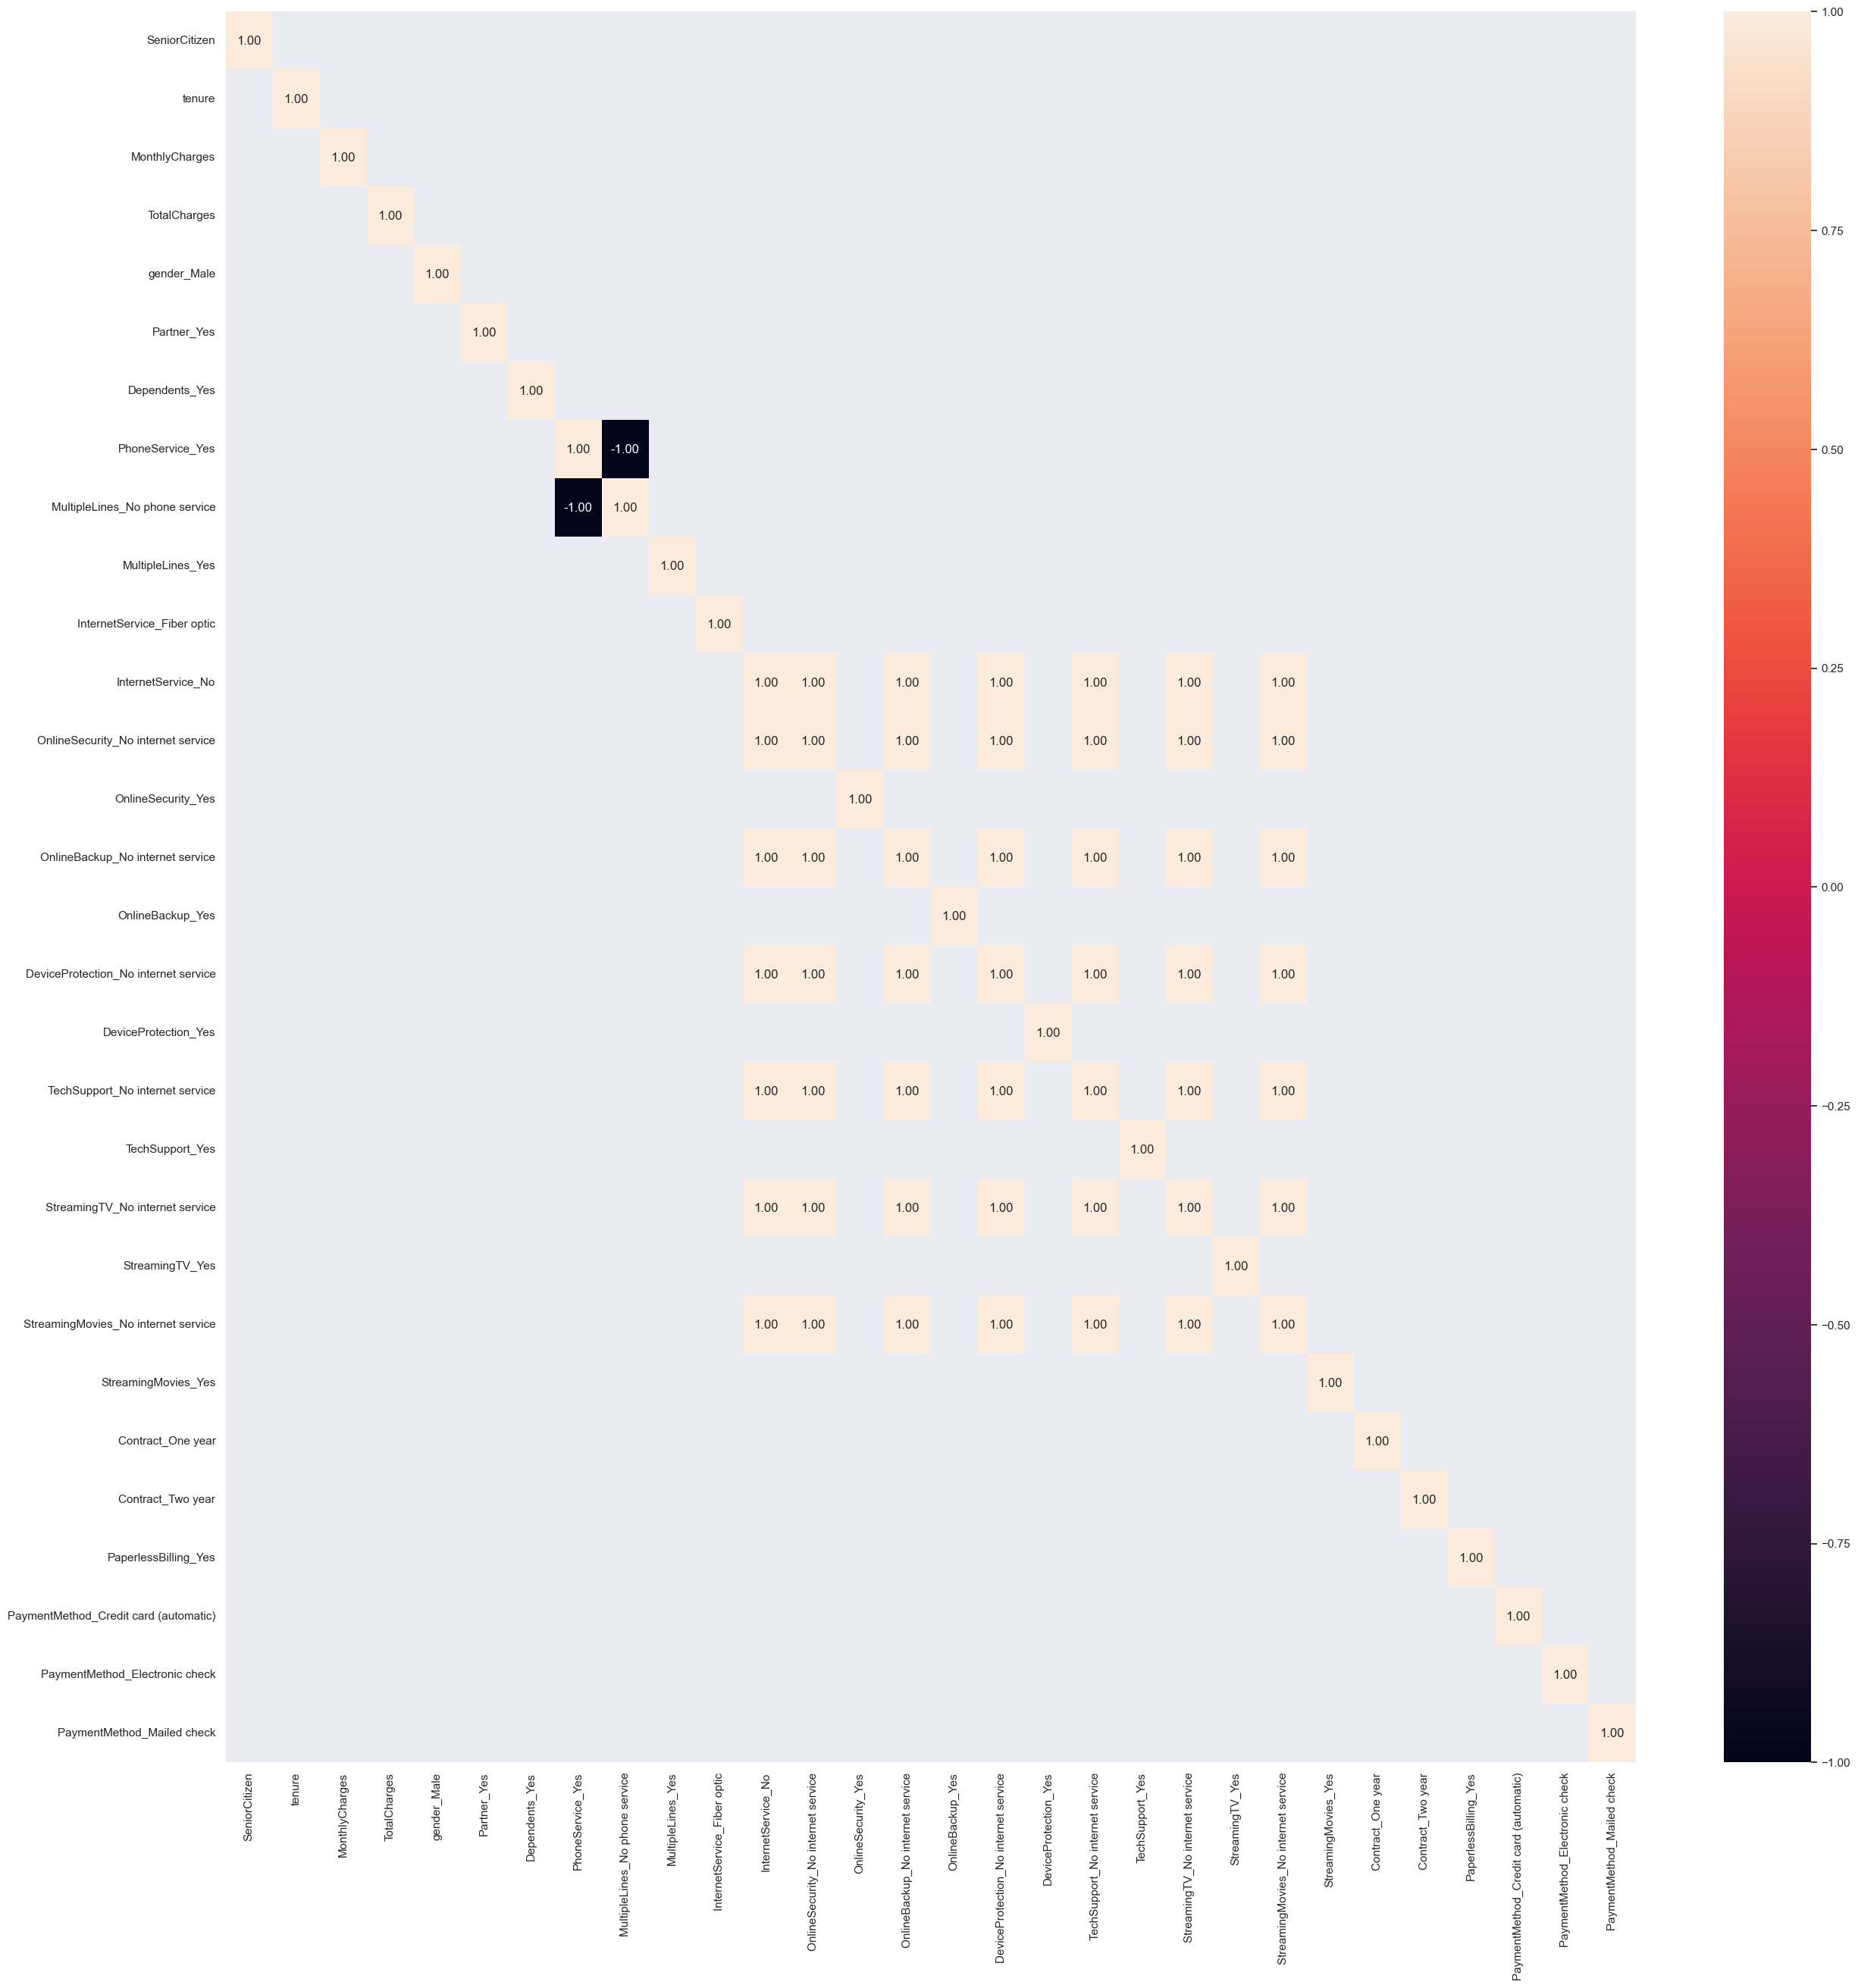

In [186]:
mask = cors[(cors>=0.85)|(cors<=-0.85)]
plt.figure(figsize=(30,30))
sns.heatmap(mask,vmin=-1,annot=True,fmt='0.2f')

In [187]:
decision_tree = DecisionTreeClassifier(max_depth = 10)
decision_tree.fit(X_train, y_train)
predictors = coll

coef = pd.Series(decision_tree.feature_importances_, predictors).sort_values(ascending=False)
coef.to_frame()

,0
tenure,0.275600
InternetService_Fiber optic,0.191498
TotalCharges,0.139700
MonthlyCharges,0.131834
Contract_Two year,0.033889
Contract_One year,0.024550
PaperlessBilling_Yes,0.019475
PaymentMethod_Electronic check,0.017858
gender_Male,0.016410
Partner_Yes,0.016037


In [188]:
def prepare(df):
    df.reset_index(drop=True, inplace=True)
    df.drop(['customerID'], axis=1, inplace=True)
    df['TotalCharges'] = df['TotalCharges'].replace(' ',np.nan)
    df['TotalCharges'] = df['TotalCharges'].astype(float)
    df.drop_duplicates(keep='first', inplace=True)
    df.reset_index(drop=True, inplace=True)
    df.dropna(inplace=True)
    df.reset_index(drop=True,inplace=True)
    X_test = df.drop(['Churn'], axis=1)
    y_test = df['Churn']
    cat1 = ['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']
    
    
    enc_data = pd.DataFrame(encoder.transform(X_test[cat1]).toarray())
    enc_data.columns = encoder.get_feature_names_out()
    X_test = X_test.join(enc_data)
    X_test.drop(cat1,axis=1,inplace=True)
    X_test = scaler.transform(X_test)
    X_test = pd.DataFrame(X_test,columns=coll)
    
    return X_test,y_test
    

In [189]:
X_test, y_test = prepare(test)

In [190]:
X_test

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.169014,0.118408,0.041934,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.478873,0.050249,0.089811,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.239437,0.010945,0.033516,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.591549,0.568159,0.362636,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,0.0,0.704225,0.023881,0.115619,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1401,0.0,0.000000,0.586070,0.006733,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1402,0.0,0.000000,0.010448,0.000058,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1403,0.0,0.070423,0.667662,0.054310,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1404,0.0,0.915493,0.362189,0.416940,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [191]:
def model_to_use(input_ml_algo):
    if input_ml_algo == 'DT':
        model = DecisionTreeClassifier()
    elif input_ml_algo == 'RF':
        model = RandomForestClassifier()
    elif input_ml_algo == 'XGBC':
        model = XGBClassifier()
    elif input_ml_algo == 'LGBMC':
        model = LGBMClassifier()
    elif input_ml_algo=='LR':
        model=LogisticRegression()
    elif input_ml_algo=='KNN':
        model=KNeighborsClassifier()
    return model

In [192]:
def performance(model,X_train,y_train,X_test, y_test):
    y_pred = model.predict(X_test)

    # Predict probability for test dataset
    y_pred_prob = model.predict_proba(X_test)
    y_pred_prob = [x[1] for x in y_pred_prob]

    disp = ConfusionMatrixDisplay.from_estimator(
    model, X_test, y_test, 
    cmap='Blues', values_format='d', 
    
 )

    print("\n Accuracy Score : \n ",accuracy_score(y_test,y_pred))
    print("\n AUC Score : \n", roc_auc_score(y_test, y_pred_prob))
    print("\n Confusion Matrix : \n ",confusion_matrix(y_test, y_pred))
    print("\n Classification Report : \n",classification_report(y_test, y_pred))

    print("\n ROC curve : \n")
    sns.set_style("white")
    plot_roc_curve(model, X_test, y_test)
    plt.show()


 Accuracy Score : 
  0.8079658605974396

 AUC Score : 
 0.85074160831444

 Confusion Matrix : 
  [[916  96]
 [174 220]]

 Classification Report : 
               precision    recall  f1-score   support

          No       0.84      0.91      0.87      1012
         Yes       0.70      0.56      0.62       394

    accuracy                           0.81      1406
   macro avg       0.77      0.73      0.75      1406
weighted avg       0.80      0.81      0.80      1406


 ROC curve : 



C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


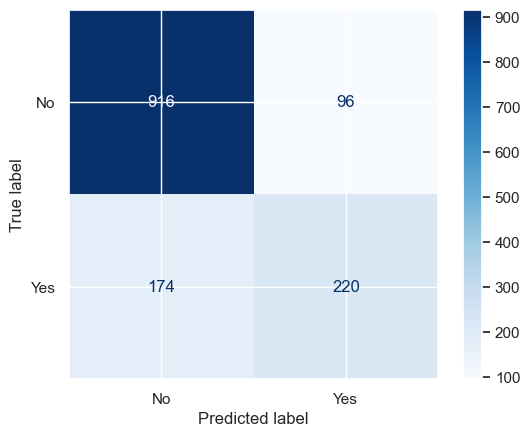

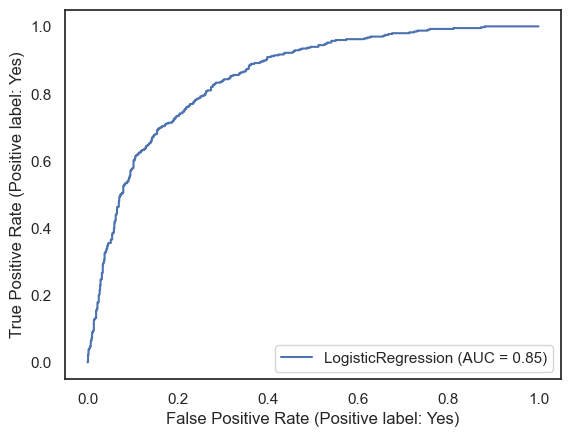

In [193]:
model1 = model_to_use("LR")

model1.fit(X_train, y_train)
performance(model1,X_train,y_train,X_test,y_test)


 Accuracy Score : 
  0.8079658605974396

 AUC Score : 
 0.85074160831444

 Confusion Matrix : 
  [[916  96]
 [174 220]]

 Classification Report : 
               precision    recall  f1-score   support

          No       0.84      0.91      0.87      1012
         Yes       0.70      0.56      0.62       394

    accuracy                           0.81      1406
   macro avg       0.77      0.73      0.75      1406
weighted avg       0.80      0.81      0.80      1406


 ROC curve : 



C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


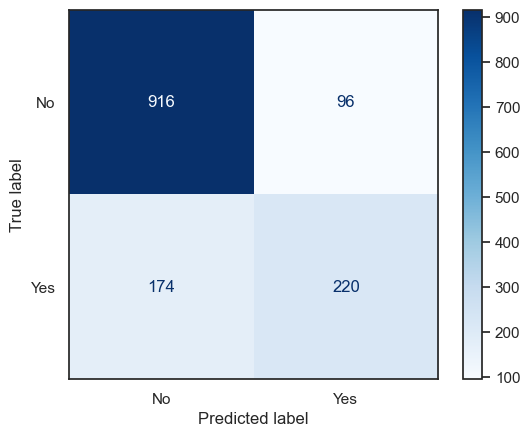

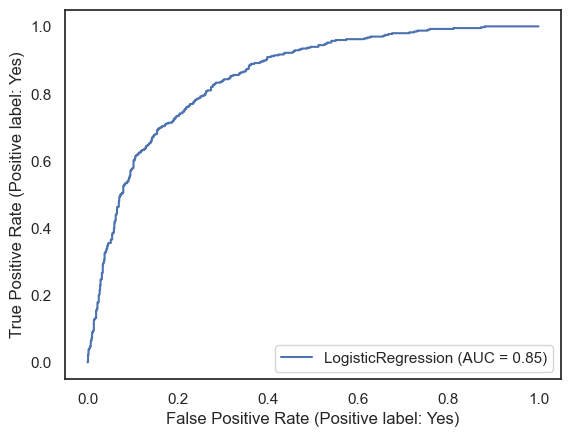

In [194]:
model2 = model_to_use("KNN")

model2.fit(X_train, y_train)
performance(model1,X_train,y_train,X_test,y_test)


 Accuracy Score : 
  0.7887624466571835

 AUC Score : 
 0.834724423667262

 Confusion Matrix : 
  [[920  92]
 [205 189]]

 Classification Report : 
               precision    recall  f1-score   support

          No       0.82      0.91      0.86      1012
         Yes       0.67      0.48      0.56       394

    accuracy                           0.79      1406
   macro avg       0.75      0.69      0.71      1406
weighted avg       0.78      0.79      0.78      1406


 ROC curve : 



C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


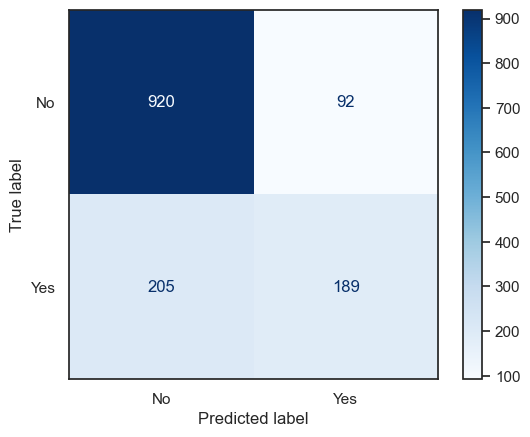

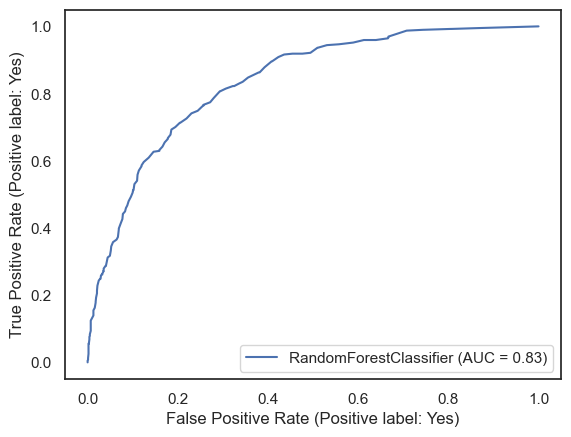

In [195]:
model3 = model_to_use("RF")

model3.fit(X_train, y_train)
performance(model3,X_train,y_train,X_test,y_test)

In [196]:
y_train.value_counts()

No     4144
Yes    1468
Name: Churn, dtype: int64

In [197]:
from imblearn.over_sampling import RandomOverSampler

In [198]:
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X_train, y_train)

In [199]:
y_ros.value_counts()

Yes    4144
No     4144
Name: Churn, dtype: int64

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



 Accuracy Score : 
  0.7510668563300142

 AUC Score : 
 0.8519629923155636

 Confusion Matrix : 
  [[739 273]
 [ 77 317]]

 Classification Report : 
               precision    recall  f1-score   support

          No       0.91      0.73      0.81      1012
         Yes       0.54      0.80      0.64       394

    accuracy                           0.75      1406
   macro avg       0.72      0.77      0.73      1406
weighted avg       0.80      0.75      0.76      1406


 ROC curve : 



C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


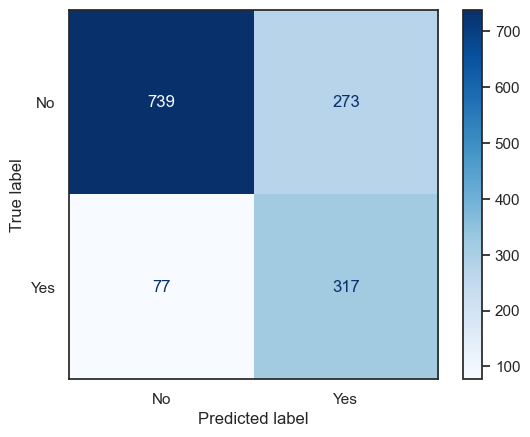

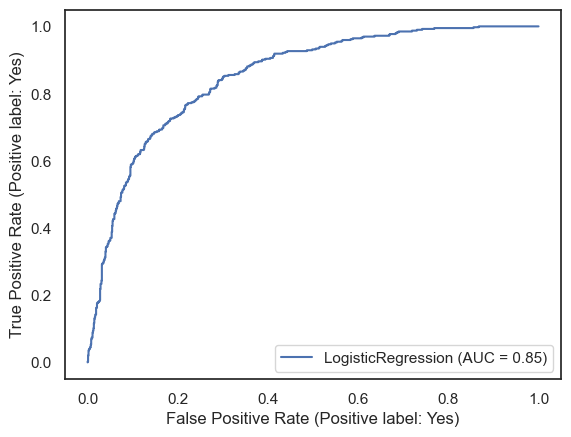

In [200]:
model4 = model_to_use("LR")

model4.fit(X_ros, y_ros)
performance(model4,X_ros,y_ros,X_test,y_test)


 Accuracy Score : 
  0.7880512091038406

 AUC Score : 
 0.8337889488573663

 Confusion Matrix : 
  [[882 130]
 [168 226]]

 Classification Report : 
               precision    recall  f1-score   support

          No       0.84      0.87      0.86      1012
         Yes       0.63      0.57      0.60       394

    accuracy                           0.79      1406
   macro avg       0.74      0.72      0.73      1406
weighted avg       0.78      0.79      0.78      1406


 ROC curve : 



C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


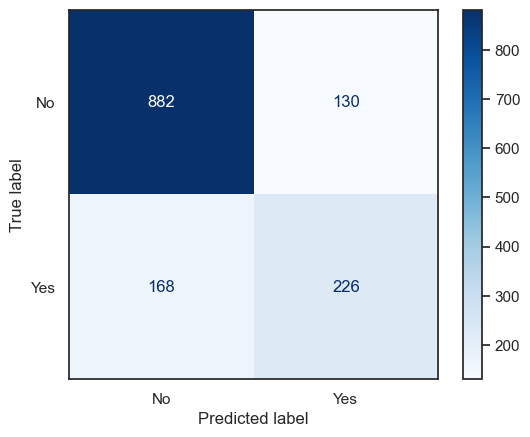

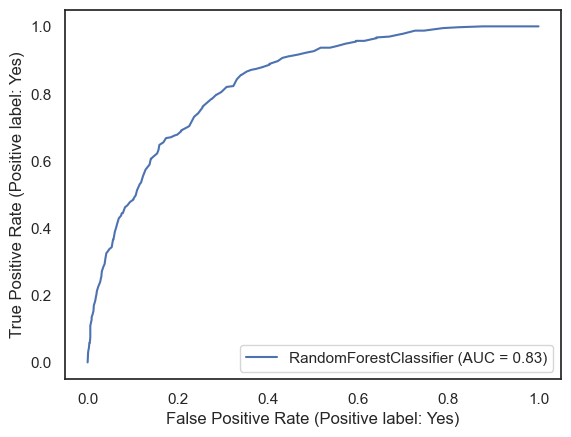

In [201]:
model5 = model_to_use("RF")

model5.fit(X_ros, y_ros)
performance(model5,X_ros,y_ros,X_test,y_test)

In [202]:
cat1

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [203]:
test

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,No,Yes,13,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,No,Electronic check,30.15,382.20,No
1,Female,0,No,No,35,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),23.30,797.10,No
2,Female,0,Yes,Yes,18,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,309.25,No
3,Male,0,No,No,43,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),75.35,3161.40,No
4,Female,0,No,No,51,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),20.65,1020.75,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1401,Female,0,No,No,1,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,77.15,77.15,Yes
1402,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,19.30,19.30,Yes
1403,Male,0,No,No,6,Yes,No,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Electronic check,85.35,489.45,Yes
1404,Male,0,Yes,Yes,66,No,No phone service,DSL,No,No,Yes,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),54.65,3632.00,No


In [232]:
new_data = df.drop(['Churn'], axis=1)

In [233]:
new_data.to_csv('new_data.csv',index=False)

In [206]:
def prep(df):
    df.reset_index(drop=True, inplace=True)
    
    df['TotalCharges'] = df['TotalCharges'].replace(' ',np.nan)
    df['TotalCharges'] = df['TotalCharges'].astype(float)
    df.drop_duplicates(keep='first', inplace=True)
    df.reset_index(drop=True, inplace=True)
    df.dropna(inplace=True)
    df.reset_index(drop=True,inplace=True)
    cust = df['customerID']
    df.drop(['customerID'], axis=1, inplace=True)

    cat1 = ['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']
    
    
    enc_data = pd.DataFrame(encoder.transform(df[cat1]).toarray())
    enc_data.columns = encoder.get_feature_names_out()
    df = df.join(enc_data)
    df.drop(cat1,axis=1,inplace=True)
    coll = df.columns
    df = scaler.transform(df)
    df = pd.DataFrame(df,columns=coll)
    
    return cust, df

In [207]:
cust,c_data = prep(new_data)

In [208]:
c_data.head(10)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.000000,0.115423,0.001275,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.464789,0.385075,0.215867,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.014085,0.354229,0.010310,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,0.619718,0.239303,0.210241,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.014085,0.521891,0.015330,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
5,0.0,0.098592,0.809950,0.092511,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
6,0.0,0.295775,0.704975,0.222779,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
7,0.0,0.126761,0.114428,0.032668,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,0.0,0.380282,0.861194,0.349325,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
9,0.0,0.859155,0.377114,0.400317,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [209]:
#imp = KNNImputer(n_neighbors=3)


#train_imp = pd.DataFrame(imp.fit_transform(train),columns=train.columns)

In [214]:
prep = model4.predict(c_data)

In [215]:
prep

array(['Yes', 'No', 'Yes', ..., 'Yes', 'Yes', 'No'], dtype=object)

In [217]:
results = pd.DataFrame({'Cust_ID':cust,"Churn_pred":prep})

In [218]:
results

,Cust_ID,Churn_pred
0,7590-VHVEG,Yes
1,5575-GNVDE,No
2,3668-QPYBK,Yes
3,7795-CFOCW,No
4,9237-HQITU,Yes
...,...,...
7027,6840-RESVB,No
7028,2234-XADUH,No
7029,4801-JZAZL,Yes
7030,8361-LTMKD,Yes


In [221]:
targ_cust=results[results['Churn_pred'] =='Yes'].reset_index(drop=True)['Cust_ID']

In [222]:
targ_cust

0       7590-VHVEG
1       3668-QPYBK
2       9237-HQITU
3       9305-CDSKC
4       1452-KIOVK
           ...    
2904    9767-FFLEM
2905    8456-QDAVC
2906    7750-EYXWZ
2907    4801-JZAZL
2908    8361-LTMKD
Name: Cust_ID, Length: 2909, dtype: object

In [226]:
#save the model
pickle.dump(model4, open('LR_model.pkl', 'wb'))
#save the encoder
pickle.dump(encoder, open('enc_class.pkl', "wb"))
#save scaler
pickle.dump(scaler, open('scal_class.pkl', 'wb'))

In [235]:
%%writefile churn.py
import streamlit as st
import pandas as pd
import pickle
import numpy as np
model4 = pickle.load(open('LR_model.pkl', 'rb'))
scaler = pickle.load(open('scal_class.pkl', 'rb'))
encoder = pickle.load(open('enc_class.pkl', 'rb'))

df = st.file_uploader('Upload a CSV')
#df1 = pd.read_csv(df)

                      
if df is not None:
#read CSV file into a dtaframe
   df = pd.read_csv(df)
else:
    st.stop()
                      
def prep(df):
    
    df['TotalCharges'] = df['TotalCharges'].replace(' ',np.nan)
    df['TotalCharges'] = df['TotalCharges'].astype(float)
    df.drop_duplicates(keep='first', inplace=True)
    df.reset_index(drop=True, inplace=True)
    df.dropna(inplace=True)
    df.reset_index(drop=True,inplace=True)
    cust = df['customerID']
    df.drop(['customerID'], axis=1, inplace=True)

    cat1 = ['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']
    
    
    enc_data = pd.DataFrame(encoder.transform(df[cat1]).toarray())
    enc_data.columns = encoder.get_feature_names_out()
    df = df.join(enc_data)
    df.drop(cat1,axis=1,inplace=True)
    coll = df.columns
    df = scaler.transform(df)
    df = pd.DataFrame(df,columns=coll)
    
    return cust, df

cust,c_data = prep(df)
prep = model4.predict(c_data)
results = pd.DataFrame({'Cust_ID':cust,"Churn_pred":prep})
targ_cust=results[results['Churn_pred'] =='Yes'].reset_index(drop=True)['Cust_ID']
c1,c2 = st.columns(2) 
                      
with c1:
    if st.button("Prediction"):
        st.dataframe(results)
        csv1 = results.to_csv(index=False)
        st.download_button("Download Predictions",csv1,file_name='predictions.csv')
with c2:
    if st.button('Churn Customers'):
        st.dataframe(targ_cust)
        csv2 = targ_cust.to_csv(index=False)
        st.download_button('Download Target customer list',csv2,file_name='churn_cust.csv')

Overwriting churn.py


In [228]:
! streamlit run churn.py

^C


In [231]:
new_data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50
7028,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90
7029,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45
7030,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60
